In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random

In [4]:
# define sigmoid function & softmax function
def sigmoid(Z):
    return 1/(1+np.exp(-Z))
def softmax_matrix(x):
    exp_sum = np.sum(np.exp(x), axis=1).repeat(10).reshape(len(x),10)
    return np.exp(x) /  exp_sum

In [5]:
# define transformation to t = [t1,t2,t3....,t10]
def target_gen(T):
    if T == 0:
        t = np.zeros(10)
        t[0] = 1
    elif T == 1:
        t = np.zeros(10)
        t[1] = 1
    elif T == 2:
        t = np.zeros(10)
        t[2] = 1 
    elif T == 3:
        t = np.zeros(10)
        t[3] = 1 
    elif T == 4:
        t = np.zeros(10)
        t[4] = 1 
    elif T == 5:
        t = np.zeros(10)
        t[5] = 1
    elif T == 6:
        t = np.zeros(10)
        t[6] = 1
    elif T == 7:
        t = np.zeros(10)  
        t[7] = 1 
    elif T == 8:
        t = np.zeros(10)
        t[8] = 1 
    elif T == 9:
        t = np.zeros(10)
        t[9] = 1 
    return(t)

# Question 4

In [3]:
# Loading dataset
%run Data_loading.ipynb
Data = load_mnist()

In [6]:
#Use training dataset
X = Data[0][0]
T = Data[0][1]
# Standardize X
Norm_X = np.zeros(len(X)*784).reshape(len(X),784)
for i in range(len(X)):
    Mean = np.mean(X[i]).repeat(X[i].shape[0])
    Norm_X[i] = (X[i] - Mean)/np.std(X[i])
target = np.zeros(len(X)*10).reshape(len(X),10)
for i in range(len(X)):
    target[i] = target_gen(T[i])
# define essential hyperparameter 
W = np.random.normal(0, 1, size=(784, 300))
B = np.zeros(1,300)     
V = np.random.normal(0, 1, size=(300, 10))
C = np.zeros(1,10) #55000x300  300x10 = 55000x10 
# define learning rate and iterations
alpha = 0.1
epoch = 100

### Run general gradient desent
Method: vectorized version of forward and backward

Aim: (1) calculate accuracy, (2) calculate cost in each epoch

In [7]:
cost_value = []
for i in range(epoch):
    correct =0
    K = np.dot(Norm_X,W)+B #55000x784 784x300 = 55000 x 300
    H = sigmoid(K)     
    Y = np.dot(H,V) + C  
    L = softmax_matrix(Y)
    loss = np.zeros(len(X))
    for i in range(len(T)):
        loss[i] =  -np.dot(np.log(L[i]).T,target[i])
        if L[i].argmax()==T[i]:
            correct = correct +1
    cost = np.sum(loss)/len(X)
    dev_Y = L-target
    dev_C = np.sum(dev_K, axis = 0, keepdims = True)/len(X)
    dev_V = np.dot(H.T, dev_Y)/len(X)
    dev_H = np.dot(dev_Y,V.T)/10
    dev_K = (H*(1-H))*dev_H
    dev_W = np.dot(Norm_X.T,dev_K)/len(X)
    dev_B = np.sum(dev_K, axis = 0, keepdims = True)/len(X)
    W -= dev_W*alpha
    B -= dev_B*alpha
    V -= dev_V*alpha
    C -= dev_C*alpha
    cost_value.append(cost) #store cost in each epoch as a vector

### Plot loss curve

Text(0.5, 0, 'epochs')

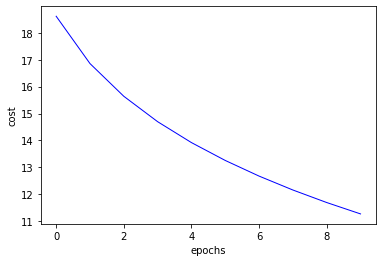

In [8]:
plt.plot(cost_value, color="blue", linewidth=1.0, linestyle="-")
plt.ylabel('cost')
plt.xlabel('epochs')

# Question 5

In [12]:
# Loading dataset
%run Data_loading.ipynb
Data = load_mnist() # gain full training data and validation set

In [13]:
# define training data and validation set
X_train = Data[0][0]
T_train = Data[0][1]
X_test = Data[1][0]
T_test = Data[1][1]
# Normalize X
Norm_X_train = (X_train)/255
Norm_X_test = (X_test)/255
target_train = np.zeros(len(X_train)*10).reshape(len(X_train),10)
for i in range(len(X_train)):
    target_train[i] = target_gen(T_train[i])
target_test = np.zeros(len(X_test)*10).reshape(len(X_test),10)
for i in range(len(X_test)):
    target_test[i] = target_gen(T_test[i])

In [16]:
# define essential hyperparameter 
W = np.random.normal(0, 1, size=(784, 300))
V = np.random.normal(0, 1, size=(300, 10))
B = np.zeros((1,300)) 
C = np.zeros((1,10))
# define learning rate and iterations
alpha = 0.1
epoch = 100

### Plot loss curve of training set and validation set
Method:general graident descent

In [17]:
train =[]
test = []
#training set: forward+calculate cost+backward
#testing set: forward+caluculate cost
for q in range(epoch):
    K = np.dot(Norm_X_train,W)+B #55000x784 784x300 = 55000 x 300
    K_test = np.dot(Norm_X_test,W)+B
    H = sigmoid(K) 
    H_test = sigmoid(K_test)     
    Y = np.dot(H,V) + C
    Y_test = np.dot(H_test,V) + C
    L = softmax_matrix(Y)
    L_test = softmax_matrix(Y_test)
    loss = np.zeros(len(X_train))
    loss_test = np.zeros(len(X_test))
    for i in range(len(X_train)):
        loss[i] =  -np.dot(np.log(L[i]).T,target_train[i])
    for i in range(len(X_test)):
        loss_test[i] =  -np.dot(np.log(L_test[i]).T,target_test[i])                     
    cost = np.sum(loss)/len(X_train)
    cost_test = np.sum(loss_test)/len(X_test)                     
    dev_Y = L-target_train
    dev_C = np.sum(dev_Y, axis = 0, keepdims = True)/len(X_train)
    dev_V = np.dot(H.T, dev_Y)/len(X_train)
    dev_H = np.dot(dev_Y,V.T)/10
    dev_K = (H*(1-H))*dev_H
    dev_W = np.dot(Norm_X_train.T,dev_K)/len(X_train)
    dev_B = np.sum(dev_K, axis = 0, keepdims = True)/len(X_train)
    W -= dev_W*alpha
    B -= dev_B*alpha
    V -= dev_V*alpha
    C -= dev_C*alpha
    train.append(cost)  #store cost(training) in each epoch as a vector
    test.append(cost_test)   #store cost(testing) in each epoch as a vector

KeyboardInterrupt: 

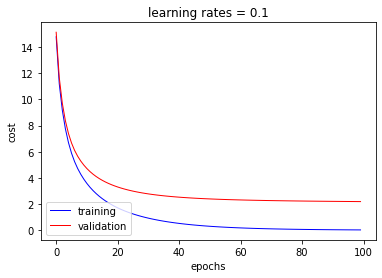

In [108]:
line_chart1 = plt.plot(train, color="blue", linewidth=1.0, linestyle="-")
line_chart2 = plt.plot(test, color="red", linewidth=1.0, linestyle="-")
plt.title("learning rates = 0.1")
plt.xlabel('epochs')
plt.ylabel('cost')
plt.legend(['training', 'validation'], loc=3)
plt.show()

### Plot an average and a standard deviation in each epoch
Method: Stochastic gradient descent

In [18]:
# Loading dataset
%run Data_loading.ipynb
Data = load_mnist() # gain full training data and validation set

In [19]:
# define training data
X_train = Data[0][0]
T_train = Data[0][1]
# Normalize X
Norm_X_train = (X_train)/255
target_train = np.zeros(len(X_train)*10).reshape(len(X_train),10)
for i in range(len(X_train)):
    target_train[i] = target_gen(T_train[i])

In [20]:
# define essential hyperparameter 
W = np.random.normal(0, 1, size=(784, 300))
V = np.random.normal(0, 1, size=(300, 10))
B = np.zeros((1,300)) 
C = np.zeros((1,10))
# define learning rate and iterations
alpha = 0.0001
epoch = 5

In [183]:
Mu = np.zeros(epoch)
Sigma = np.zeros(epoch)
for e in range(epoch):
    train = []
# average the last 50 value in each epoch
    for a in range(len(X_train)):
        K = np.dot(Norm_X_train[a],W)+B #55000x784 784x300 = 55000 x 300
        H = sigmoid(K)   
        Y = np.dot(H,V) + C
        L = softmax_matrix(Y)
        loss =  np.zeros(1)
        loss =  -np.dot(np.log(L),target_train[a])
        cost = np.sum(loss)
        dev_Y = L-target_train[a]
        dev_C = dev_Y
        dev_V = np.dot(H.T, dev_Y)
        dev_H = np.dot(dev_Y,V.T)/10
        dev_K = (H*(1-H))*dev_H
        dev_W = np.dot(Norm_X_train[a].reshape(784,1),dev_K)
        dev_B = dev_K
        W -= dev_W*alpha
        B -= dev_B*alpha
        V -= dev_V*alpha
        C -= dev_C*alpha 
        train.append(cost) 
    Mu[e] = np.mean(train)
    Sigma[e] = np.std(train)

[8.10678269 0.         0.         0.         0.        ]
[7.13781354 0.         0.         0.         0.        ]
[8.10678269 4.8739587  0.         0.         0.        ]
[7.13781354 5.20352194 0.         0.         0.        ]
[8.10678269 4.8739587  3.69990716 0.         0.        ]
[7.13781354 5.20352194 4.60860513 0.         0.        ]
[8.10678269 4.8739587  3.69990716 3.03576905 0.        ]
[7.13781354 5.20352194 4.60860513 4.22169852 0.        ]
[8.10678269 4.8739587  3.69990716 3.03576905 2.61524821]
[7.13781354 5.20352194 4.60860513 4.22169852 3.95545175]


In [21]:
# set boundary based on one +/- standard deviation
lower_bound = Mu*np.ones(epoch)- Sigma*np.sqrt(np.ones(epoch))
upper_bound = Mu*np.ones(epoch) + Sigma*np.sqrt(np.ones(epoch)) 
plt.plot(np.arange(epoch), (Mu*np.ones(epoch)), lw=1, label='mean of loss in iteration', color='black', ls='-')
plt.fill_between(np.arange(epoch), lower_bound, upper_bound, facecolor='yellow', alpha=0.5,
                label='1 sigma range', interpolate=True)
plt.legend(['mean of loss in iteration', 'standard deviation'], loc=1)
plt.title("learning rates = 0.0001")
plt.show()

NameError: name 'Mu' is not defined

### Learning rate test
Method: Stochastic gradient descent

In [189]:
# define essential hyperparameter 
random.seed(112) #set seed to ensure initialization is the same
W = np.random.normal(0, 1, size=(784, 300))
V = np.random.normal(0, 1, size=(300, 10))
B = np.zeros((1,300)) 
C = np.zeros((1,10))
# define learning rate and iterations
alpha = 0.001 #0.001, 0.0001 or 0.0005
epoch = 5

In [190]:
K = []
H = []
L = []
train = []
for e in range(epoch):
    for a in range(len(X_train)):
        K = np.dot(Norm_X_train[a],W)+B #55000x784 784x300 = 55000 x 300
        H = sigmoid(K)   
        Y = np.dot(H,V) + C
        L = softmax_matrix(Y)
        loss =  np.zeros(1)
        loss =  -np.dot(np.log(L),target_train[a])
        cost = np.sum(loss)
        dev_Y = L-target_train[a]
        dev_C = dev_Y
        dev_V = np.dot(H.T, dev_Y)
        dev_H = np.dot(dev_Y,V.T)/10
        dev_K = (H*(1-H))*dev_H
        dev_W = np.dot(Norm_X_train[a].reshape(784,1),dev_K)
        dev_B = dev_K
        W -= dev_W*alpha
        B -= dev_B*alpha
        V -= dev_V*alpha
        C -= dev_C*alpha 
    cost = np.sum(loss)
    train.append(cost)
    print(cost)

KeyboardInterrupt: 

In [163]:
train_alpha_00001

[73.18408802234983,
 71.77481376615265,
 32.80520371419264,
 24.72649782750139,
 24.103604645837763]

In [164]:
train_alpha_00005

[33.89272805386113,
 23.272406650609835,
 23.1456253722862,
 23.105102773028683,
 23.087530233025735]

In [170]:
train_alpha_0001

[23.42246247643491,
 23.12945770770768,
 23.08441174044261,
 23.06950696644038,
 23.06255149976546]

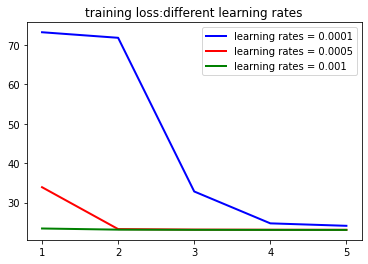

In [174]:
plt.plot(['1','2','3','4','5'], train_alpha_00001, lw=2, label='training loss', color='blue')
plt.plot(['1','2','3','4','5'], train_alpha_00005, lw=2, label='training loss', color='red')
plt.plot(['1','2','3','4','5'], train_alpha_0001, lw=2, label='training loss', color='green')
plt.title("training loss:different learning rates")
plt.legend(['learning rates = 0.0001', 'learning rates = 0.0005','learning rates = 0.001'], loc=1)        
plt.show()

### Accuracy test
Method: General gradient descent

In [286]:
# Loading dataset
%run Data_loading.ipynb
Data = load_mnist(final = True) # training set and canonical testing set

In [287]:
#Use training dataset
X = Data[0][0]
T = Data[0][1]
# Normalize X
Norm_X = X/255
target = np.zeros(len(X)*10).reshape(len(X),10)
for i in range(len(X)):
    target[i] = target_gen(T[i])
# define essential hyperparameter 
W = np.random.normal(0, 1, size=(784, 300))
B = np.zeros((1,300))       
V = np.random.normal(0, 1, size=(300, 10))
C = np.zeros((1,10)) 
# define learning rate and iterations
alpha = 0.1
epoch = 500
#Use canonical test set
X_test = Data[1][0]
T_test = Data[1][1]
# Normalize X
Norm_X_test = X_test/255
target_test = np.zeros(len(X_test)*10).reshape(len(X_test),10)
for i in range(len(X_test)):
    target_test[i] = target_gen(T_test[i])
epoch = 10000

In [ ]:
cost_value = []
Accu_test = []
Accu_train = []
for i in range(epoch):
    K = np.dot(Norm_X,W)+B #55000x784 784x300 = 55000 x 300
    H = sigmoid(K)     
    Y = np.dot(H,V) + C  
    L = softmax_matrix(Y)
# calculate accuracy of training set
    correct = 0
    for i in range(len(X)):
        if (L[i].argmax() == T[i]):
            correct +=1
    Accuracy = correct/len(X)
    Accu_train.append(Accuracy)  # store accuracy
    loss = np.zeros(len(X))
    for i in range(len(T)):
        loss[i] =  -np.dot(np.log(L[i]).T,target[i])
    cost = np.sum(loss)/len(X)
    dev_Y = L-target
    dev_C = np.sum(dev_Y, axis = 0, keepdims = True)/len(X)
    dev_V = np.dot(H.T, dev_Y)/len(X)
    dev_H = np.dot(dev_Y,V.T)/10
    dev_K = (H*(1-H))*dev_H
    dev_W = np.dot(Norm_X.T,dev_K)/len(X)
    dev_B = np.sum(dev_K, axis = 0, keepdims = True)/len(X)
    W -= dev_W*alpha
    B -= dev_B*alpha
    V -= dev_V*alpha
    C -= dev_C*alpha
# Forward to get L(test)
    K = np.dot(Norm_X_test,W)+B
    H = sigmoid(K)     
    Y = np.dot(H,V) + C  
    L = softmax_matrix(Y)
# calculate accuracy of testing set
    correct = 0
    for i in range(len(X_test)):
        if (L[i].argmax() == T_test[i]):
            correct +=1
    Accuracy = correct/len(X_test)
    Accu_test.append(Accuracy) # store accuracy

0.09691666666666666
0.0963
0.09663333333333333
0.0942
0.09526666666666667
0.093
0.09401666666666667
0.0916
0.09476666666666667
0.0924
0.0973
0.0959
0.09995
0.1003
0.10358333333333333
0.104
0.10705
0.1072
0.11046666666666667
0.1102
0.11358333333333333
0.1113
0.11685
0.1146
0.12008333333333333
0.1177
0.12346666666666667
0.1206
0.12651666666666667
0.1243
0.12943333333333334
0.1275
0.13236666666666666
0.1309
0.13565
0.1336
0.13888333333333333
0.1371
0.14231666666666667
0.1404
0.1449
0.1437
0.14813333333333334
0.1453
0.15111666666666668
0.1488
0.1539
0.1514
0.15696666666666667
0.1548
0.16058333333333333
0.1577
0.16366666666666665
0.1614
0.16685
0.1645
0.1699
0.1675
0.17308333333333334
0.1712
0.1761
0.1748
0.17928333333333332
0.1788
0.18266666666666667
0.1826
0.18568333333333334
0.1871
0.18893333333333334
0.191
0.19218333333333334
0.194
0.19568333333333332
0.198
0.19925
0.2009
0.20281666666666667
0.205
0.20598333333333332
0.2085
0.20966666666666667
0.212
0.21268333333333334
0.2157
0.21628333

0.63665
0.6346
0.6370666666666667
0.6347
0.6374666666666666
0.6354
0.6379
0.6361
0.6383166666666666
0.6366
0.6389
0.6374
0.6393333333333333
0.6386
0.6397666666666667
0.6395
0.64015
0.6396
0.6405333333333333
0.6397
0.6408666666666667
0.6399
0.6413333333333333
0.6401
0.6416166666666666
0.6405
0.6420333333333333
0.6409
0.6426166666666666
0.6416
0.6430666666666667
0.6419
0.64355
0.642
0.644
0.6425
0.6443833333333333
0.643
0.64485
0.6434
0.6452666666666667
0.6436
0.6457666666666667
0.644
0.6458833333333334
0.6444
0.6462166666666667
0.6446
0.64655
0.6448
0.6469333333333334
0.6452
0.6471666666666667
0.6459
0.6475333333333333
0.6461
0.6479
0.6465
0.6482666666666667
0.6469
0.6487166666666667
0.6475
0.6490333333333334
0.6477
0.6494833333333333
0.6482
0.6498
0.6485
0.6502
0.6489
0.65045
0.649
0.6507166666666667
0.6494
0.6511333333333333
0.6498
0.6516333333333333
0.6503
0.6520333333333334
0.6505
0.6525833333333333
0.6514
0.6529
0.6518
0.6533
0.6521
0.6536333333333333
0.6526
0.6540833333333333
0.65

0.729
0.7311
0.7294
0.73135
0.7295
0.7315166666666667
0.7299
0.7316
0.73
0.73175
0.73
0.7319
0.7301
0.7319666666666667
0.7302
0.73215
0.7302
0.73225
0.7304
0.73235
0.7304
0.7325166666666667
0.7306
0.7326833333333334
0.7306
0.7328833333333333
0.7309
0.7329333333333333
0.7312
0.7331833333333333
0.7313
0.7333666666666666
0.7316
0.7335666666666667
0.7316
0.7337166666666667
0.7317
0.7338333333333333
0.7319
0.7339833333333333
0.7319
0.7341833333333333
0.7321
0.7342666666666666
0.7322
0.7343833333333334
0.7326
0.73455
0.7328
0.7347
0.7329
0.7348333333333333
0.733
0.7349166666666667
0.7332
0.73505
0.7332
0.7351666666666666
0.7335
0.7352666666666666
0.7337
0.7354666666666667
0.7341
0.73555
0.7343
0.7356833333333334
0.7346
0.7358333333333333
0.7348
0.7359666666666667
0.735
0.7361166666666666
0.735
0.73625
0.7352
0.7364166666666667
0.7353
0.7365666666666667
0.7353
0.7367333333333334
0.7357
0.7369166666666667
0.7358
0.7370333333333333
0.736
0.7371666666666666
0.7361
0.7373
0.7362
0.7374
0.7366
0.7

0.7696
0.7721
0.7698
0.7722166666666667
0.77
0.7722833333333333
0.77
0.7723166666666667
0.77
0.7723833333333333
0.7701
0.7724
0.7702
0.7724333333333333
0.7704
0.7726
0.7706
0.77265
0.7705
0.7726833333333334
0.7708
0.77275
0.771
0.7728833333333334
0.771
0.7729833333333334
0.771
0.7729833333333334
0.7711
0.7731166666666667
0.771
0.7732166666666667
0.771
0.7732833333333333
0.7711
0.7733333333333333
0.7712
0.7733833333333333
0.7713
0.7735
0.7714
0.7735833333333333
0.7714
0.7736333333333333
0.7714
0.77365
0.7715
0.7737166666666667
0.7716
0.7737833333333334
0.7716
0.7738666666666667
0.7716
0.7739
0.7717
0.7740333333333334
0.7718
0.7740833333333333
0.7718
0.7741833333333333
0.7718
0.77425
0.7718
0.7743166666666667
0.7718
0.7743833333333333
0.7718
0.7744666666666666
0.7719
0.7745666666666666
0.7719
0.7746166666666666
0.7721
0.7747166666666667
0.7721
0.7748166666666667
0.7722
0.7748666666666667
0.7722
0.7749333333333334
0.7723
0.775
0.7726
0.7750333333333334
0.7729
0.7751666666666667
0.7729
0.7

0.7972166666666667
0.791
0.7972833333333333
0.7912
0.7973166666666667
0.7912
0.7973666666666667
0.7912
0.7974
0.7912
0.7974666666666667
0.7912
0.7975833333333333
0.7913
0.79765
0.7914
0.7976666666666666
0.7915
0.7977166666666666
0.7916
0.7977666666666666
0.7917
0.7978
0.7917
0.7978333333333333
0.7918
0.79785
0.7919
0.7979333333333334
0.7919
0.7979166666666667
0.7919
0.7979833333333334
0.792
0.7980166666666667
0.7921
0.798
0.7924
0.7980333333333334
0.7925
0.79805
0.7925
0.7981166666666667
0.7925
0.79815
0.7925
0.7982
0.7925
0.7982166666666667
0.7925
0.7983166666666667
0.7925
0.79835
0.7926
0.7984333333333333
0.7926
0.7984833333333333
0.7927
0.7985833333333333
0.7927
0.7986833333333333
0.7928
0.7987666666666666
0.793
0.7988166666666666
0.7931
0.7988666666666666
0.7931
0.79895
0.7931
0.7990166666666667
0.7931
0.7991
0.7931
0.7991333333333334
0.7932
0.7992
0.7933
0.7993166666666667
0.7935
0.7993166666666667
0.7936
0.7993666666666667
0.7937
0.7994166666666667
0.7938
0.7995166666666667
0.793

0.8092
0.8136166666666667
0.8092
0.81365
0.8092
0.8136666666666666
0.8092
0.8137166666666666
0.8092
0.8137666666666666
0.8093
0.8138333333333333
0.8093
0.8138833333333333
0.8094
0.8139333333333333
0.8095
0.8139833333333333
0.8096
0.8139833333333333
0.8096
0.8140166666666667
0.8096
0.81405
0.8096
0.8140833333333334
0.8096
0.8141333333333334
0.8096
0.8142
0.8096
0.81425
0.8096
0.8142666666666667
0.8096
0.8143833333333333
0.8097
0.81445
0.8098
0.81445
0.8098
0.8144666666666667
0.8099
0.8144666666666667
0.8099
0.8145
0.8099
0.8145666666666667
0.81
0.8145833333333333
0.81
0.81465
0.8101
0.8147166666666666
0.8103
0.8147333333333333
0.8106
0.8148
0.8106
0.8148166666666666
0.8107
0.8148
0.8108
0.8148333333333333
0.8109
0.8148666666666666
0.8109
0.8149
0.8109
0.8149166666666666
0.8109
0.815
0.8109
0.8150333333333334
0.8109
0.8150833333333334
0.8109
0.8151166666666667
0.8109
0.81515
0.8109
0.8152333333333334
0.811
0.8153
0.811
0.8153
0.811
0.81535
0.811
0.8153666666666667
0.811
0.8154
0.811
0.81

0.8229
0.8254833333333333
0.8229
0.8255
0.8229
0.8255333333333333
0.8229
0.8255666666666667
0.8229
0.8256166666666667
0.8229
0.8256333333333333
0.8228
0.8256833333333333
0.8228
0.8256833333333333
0.8228
0.8257
0.8228
0.8257833333333333
0.823
0.8258166666666666
0.8231
0.8257833333333333
0.8231
0.8257833333333333
0.8231
0.8258166666666666
0.8231
0.82585
0.8231
0.8258666666666666
0.8231
0.82595
0.8231
0.8260166666666666
0.8231
0.8260666666666666
0.8231
0.8260833333333333
0.8231
0.8261
0.8231
0.8261333333333334
0.8231
0.8262166666666667
0.8232
0.82625
0.8232
0.8262833333333334
0.8232
0.8263
0.8232
0.8263
0.8232
0.82635
0.8233
0.8263333333333334
0.8233
0.8263833333333334
0.8233
0.8263833333333334
0.8233
0.8264333333333334
0.8233
0.82645
0.8233
0.8264666666666667
0.8233
0.82655
0.8234
0.8265833333333333
0.8234
0.8266
0.8236
0.8266166666666667
0.8236
0.8266333333333333
0.8236
0.8266166666666667
0.8236
0.8266166666666667
0.8236
0.82665
0.8236
0.8266666666666667
0.8236
0.82675
0.8236
0.82676666

0.8355
0.8306
0.8355
0.8306
0.8355
0.8307
0.83555
0.8307
0.8355666666666667
0.8307
0.83555
0.8307
0.83555
0.8307
0.83555
0.8307
0.8355833333333333
0.8307
0.8355833333333333
0.8307
0.8356333333333333
0.8308
0.83565
0.8309
0.83565
0.8309
0.8357166666666667
0.8309
0.8357333333333333
0.8309
0.8357333333333333
0.8309
0.8358
0.8309
0.8358166666666667
0.8309
0.8358333333333333
0.8309
0.83585
0.8308
0.8358666666666666
0.8309
0.8359166666666666
0.8309
0.83595
0.8309
0.83595
0.8309
0.836
0.8309
0.8360333333333333
0.8309
0.8360666666666666
0.8309
0.8360833333333333
0.8309
0.8360833333333333
0.8309
0.8361333333333333
0.8309
0.83615
0.8309
0.8362
0.8309
0.8362
0.8309
0.8362
0.8309
0.83625
0.8309
0.83625
0.8309
0.83625
0.831
0.83625
0.831
0.8362666666666667
0.831
0.8363
0.8311
0.8362833333333334
0.8311
0.8363333333333334
0.8311
0.8363666666666667
0.8312
0.8363833333333334
0.8312
0.8364166666666667
0.8312
0.8364333333333334
0.8312
0.83645
0.8312
0.8365
0.8313
0.8365
0.8313
0.8365666666666667
0.8313
0

0.8434166666666667
0.8374
0.8434666666666667
0.8375
0.8434833333333334
0.8374
0.8435
0.8374
0.8435
0.8375
0.8435166666666667
0.8376
0.8435166666666667
0.8376
0.8435166666666667
0.8376
0.8435166666666667
0.8376
0.8435
0.8376
0.8435
0.8376
0.8435333333333334
0.8376
0.8435333333333334
0.8376
0.8435333333333334
0.8377
0.8435666666666667
0.8377
0.8435666666666667
0.8377
0.8436166666666667
0.8377
0.8436333333333333
0.8377
0.8436333333333333
0.8377
0.84365
0.8378
0.8436833333333333
0.8378
0.8437
0.8378
0.8437
0.8378
0.8437166666666667
0.8379
0.8437333333333333
0.8379
0.8438
0.8379
0.8438166666666667
0.8379
0.8438333333333333
0.8379
0.84385
0.8379
0.8438666666666667
0.8379
0.8438666666666667
0.8379
0.8438833333333333
0.8379
0.8439
0.8379
0.8439333333333333
0.8379
0.84395
0.8379
0.84395
0.8379
0.8439833333333333
0.8379
0.8439833333333333
0.8379
0.8439833333333333
0.8379
0.844
0.8379
0.8440166666666666
0.8381
0.8440333333333333
0.8382
0.84405
0.8382
0.84405
0.8382
0.84405
0.8384
0.84406666666666

0.8428
0.8491833333333333
0.8428
0.8492
0.8428
0.8492166666666666
0.8428
0.8492666666666666
0.8428
0.8492833333333333
0.8428
0.8492833333333333
0.8428
0.8493166666666667
0.8428
0.8493166666666667
0.8428
0.8493166666666667
0.8429
0.8493166666666667
0.8429
0.8493333333333334
0.843
0.8493333333333334
0.843
0.84935
0.843
0.84935
0.843
0.8494166666666667
0.843
0.8494333333333334
0.843
0.8494333333333334
0.843
0.84945
0.843
0.8494666666666667
0.843
0.8494833333333334
0.843
0.8494833333333334
0.843
0.8495166666666667
0.8431
0.8495166666666667
0.8431
0.8495333333333334
0.8431
0.8495333333333334
0.8431
0.84955
0.8431
0.84955
0.8432
0.8495666666666667
0.8433
0.8495666666666667
0.8433
0.8495666666666667
0.8433
0.8495666666666667
0.8433
0.8496166666666667
0.8433
0.84965
0.8433
0.8496666666666667
0.8433
0.8496833333333333
0.8433
0.8496833333333333
0.8433
0.8497
0.8433
0.8497166666666667
0.8434
0.8497333333333333
0.8434
0.8497833333333333
0.8434
0.8497833333333333
0.8434
0.8497666666666667
0.8434
0.

0.8489
0.8546333333333334
0.8489
0.8546333333333334
0.8489
0.8546666666666667
0.8489
0.8547
0.849
0.8547166666666667
0.8491
0.8547333333333333
0.8491
0.85475
0.8491
0.8547666666666667
0.8491
0.8547833333333333
0.8492
0.85485
0.8492
0.85485
0.8492
0.8548666666666667
0.8492
0.8548666666666667
0.8492
0.8549
0.8492
0.8549166666666667
0.8492
0.8549166666666667
0.8492
0.8549333333333333
0.8492
0.85495
0.8492
0.85495
0.8492
0.8549333333333333
0.8492
0.8549333333333333
0.8492
0.85495
0.8492
0.85495
0.8492
0.8549666666666667
0.8492
0.855
0.8492
0.8550333333333333
0.8492
0.85505
0.8492
0.8550666666666666
0.8492
0.8551
0.8494
0.8551333333333333
0.8494
0.85515
0.8494
0.85515
0.8494
0.85515
0.8494
0.8551666666666666
0.8494
0.8551833333333333
0.8495
0.8552166666666666
0.8495
0.85525
0.8495
0.85525
0.8496
0.8552666666666666
0.8496
0.8553
0.8496
0.8553
0.8496
0.8553
0.8496
0.8553166666666666
0.8496
0.85535
0.8496
0.85535
0.8496
0.8553666666666667
0.8496
0.8553666666666667
0.8496
0.8554166666666667
0.8

0.8545
0.8602333333333333
0.8545
0.86025
0.8545
0.8602666666666666
0.8545
0.8602666666666666
0.8545
0.8602833333333333
0.8545
0.8603
0.8546
0.8603166666666666
0.8547
0.8603166666666666
0.8547
0.8603166666666666
0.8547
0.8603166666666666
0.8547
0.8603333333333333
0.8548
0.8603333333333333
0.8548
0.8603333333333333
0.8548
0.8603666666666666
0.8548
0.8603666666666666
0.8548
0.8604166666666667
0.8548
0.8604166666666667
0.8548
0.8604166666666667
0.8548
0.8604166666666667
0.8548
0.8604166666666667
0.8548
0.8604166666666667
0.8548
0.8604166666666667
0.8548
0.8604166666666667
0.8549
0.86045
0.8549
0.8604666666666667
0.8549
0.8604833333333334
0.8549
0.8604833333333334
0.8549
0.8605166666666667
0.8549
0.8605333333333334
0.8549
0.8605333333333334
0.8549
0.8605833333333334
0.8549
0.8606
0.8549
0.8606
0.8549
0.8606166666666667
0.8549
0.8606166666666667
0.8549
0.8606166666666667
0.8549
0.8606833333333334
0.8549
0.8607
0.8549
0.8607
0.8549
0.8607
0.8549
0.8607
0.8549
0.8606833333333334
0.8549
0.86068

0.8578
0.86405
0.8578
0.86405
0.8578
0.8640666666666666
0.8578
0.8640666666666666
0.8578
0.8640833333333333
0.8578
0.8640666666666666
0.8578
0.8640666666666666
0.8578
0.8641
0.8578
0.8641166666666666
0.8578
0.8641333333333333
0.8578
0.8641333333333333
0.8578
0.8641666666666666
0.8578
0.8641833333333333
0.8578
0.8642166666666666
0.8578
0.8642166666666666
0.8578
0.8642166666666666
0.8578
0.8642166666666666
0.8578
0.8642166666666666
0.8579
0.8642166666666666
0.8579
0.8642333333333333
0.8579
0.8642666666666666
0.8579
0.8643
0.8579
0.8643
0.8579
0.8643
0.8579
0.8643166666666666
0.8579
0.8643166666666666
0.8578
0.8643333333333333
0.8578
0.8643333333333333
0.8579
0.86435
0.8579
0.86435
0.8579
0.86435
0.8579
0.8643666666666666
0.8579
0.8643666666666666
0.8579
0.8643833333333333
0.8579
0.8644
0.8579
0.8644166666666667
0.858
0.8644333333333334
0.858
0.8644333333333334
0.858
0.8644333333333334
0.858
0.86445
0.858
0.86445
0.858
0.8644666666666667
0.858
0.8644666666666667
0.858
0.8645
0.858
0.86451

0.8608
0.8678166666666667
0.8608
0.8678166666666667
0.8608
0.8678333333333333
0.8609
0.86785
0.8609
0.86785
0.8609
0.8678666666666667
0.8609
0.8678666666666667
0.8609
0.8678666666666667
0.8609
0.8678666666666667
0.8609
0.8678833333333333
0.8609
0.8678833333333333
0.8609
0.8679333333333333
0.8609
0.8679333333333333
0.8609
0.86795
0.861
0.8679666666666667
0.861
0.8679666666666667
0.861
0.868
0.861
0.8680166666666667
0.861
0.8680166666666667
0.8611
0.8680333333333333
0.8611
0.8680333333333333
0.8611
0.86805
0.8611
0.86805
0.8611
0.86805
0.8611
0.86805
0.8611
0.86805
0.8611
0.8680333333333333
0.8611
0.8680333333333333
0.8611
0.86805
0.8611
0.86805
0.8611
0.86805
0.8611
0.8680666666666667
0.8611
0.8680833333333333
0.8611
0.8681
0.8612
0.8681
0.8612
0.8681166666666666
0.8612
0.8681333333333333
0.8612
0.86815
0.8612
0.8681666666666666
0.8612
0.8681666666666666
0.8612
0.8681666666666666
0.8612
0.8682166666666666
0.8612
0.8682
0.8612
0.8682
0.8612
0.8682166666666666
0.8612
0.8682166666666666
0.

0.8714333333333333
0.8638
0.87145
0.8638
0.87145
0.8637
0.8714833333333334
0.8637
0.8714833333333334
0.8637
0.8714833333333334
0.8637
0.8714833333333334
0.8637
0.8714833333333334
0.8637
0.8714833333333334
0.8637
0.8715
0.8637
0.8715
0.8637
0.8714833333333334
0.8637
0.8714833333333334
0.8637
0.8714833333333334
0.8637
0.8715
0.8638
0.8715
0.8638
0.8715
0.8639
0.8715
0.8639
0.8715
0.8639
0.8714833333333334
0.8639
0.8714833333333334
0.8639
0.8714833333333334
0.8639
0.8714833333333334
0.8639
0.8714666666666666
0.8639
0.8714833333333334
0.8639
0.8715
0.8639
0.8715166666666667
0.864
0.8715166666666667
0.864
0.8715166666666667
0.864
0.87155
0.864
0.87155
0.864
0.87155
0.864
0.8715666666666667
0.864
0.8715833333333334
0.864
0.8716
0.864
0.8716
0.864
0.8716166666666667
0.864
0.87165
0.864
0.8717
0.864
0.8717166666666667
0.864
0.8717333333333334
0.864
0.8717333333333334
0.864
0.8717333333333334
0.864
0.8717166666666667
0.8641
0.8717333333333334
0.8641
0.87175
0.8641
0.87175
0.8641
0.87175
0.8641


0.87465
0.8669
0.8746666666666667
0.8669
0.8746833333333334
0.8669
0.8747
0.8669
0.8747
0.8669
0.8747
0.8669
0.8747
0.8669
0.8747333333333334
0.8669
0.87475
0.8669
0.87475
0.8669
0.87475
0.8669
0.8747666666666667
0.8669
0.8747833333333334
0.8669
0.8747833333333334
0.8669
0.8747833333333334
0.8669
0.8747833333333334
0.8669
0.8747833333333334
0.867
0.8747833333333334
0.867
0.8747833333333334
0.8671
0.8747833333333334
0.867
0.8747666666666667
0.8671
0.8747666666666667
0.8671
0.8747666666666667
0.8671
0.8747833333333334
0.8671
0.8747833333333334
0.8671
0.8748
0.8671
0.8748166666666667
0.8671
0.8748333333333334
0.8671
0.87485
0.8671
0.8749
0.8671
0.8749
0.8672
0.8749
0.8672
0.8749166666666667
0.8672
0.8749166666666667
0.8672
0.8749166666666667
0.8672
0.87495
0.8672
0.8749833333333333
0.8672
0.8749833333333333
0.8673
0.8749833333333333
0.8673
0.875
0.8673
0.875
0.8673
0.8750333333333333
0.8673
0.8750333333333333
0.8673
0.8750333333333333
0.8673
0.8750666666666667
0.8673
0.8750666666666667
0.

0.869
0.8777666666666667
0.869
0.8777666666666667
0.869
0.8777666666666667
0.869
0.8777833333333334
0.869
0.8777833333333334
0.869
0.8778
0.869
0.8778
0.869
0.8778333333333334
0.869
0.8778333333333334
0.869
0.8778333333333334
0.869
0.8778333333333334
0.869
0.8778666666666667
0.869
0.8778666666666667
0.869
0.8778666666666667
0.869
0.8778833333333333
0.8691
0.8779
0.8691
0.8779
0.8691
0.8779166666666667
0.8691
0.8779333333333333
0.8691
0.8779333333333333
0.8691
0.8779333333333333
0.8691
0.8779333333333333
0.8691
0.8779333333333333
0.8691
0.87795
0.8691
0.8779666666666667
0.8692
0.8779833333333333
0.8692
0.878
0.8692
0.878
0.8692
0.8780166666666667
0.8692
0.87805
0.8692
0.87805
0.8692
0.8780666666666667
0.8692
0.87805
0.8692
0.87805
0.8692
0.8780333333333333
0.8692
0.87805
0.8692
0.87805
0.8692
0.87805
0.8693
0.8780666666666667
0.8693
0.8780833333333333
0.8693
0.8781
0.8693
0.8781166666666667
0.8693
0.8781166666666667
0.8693
0.8781166666666667
0.8693
0.8781166666666667
0.8693
0.8781166666

0.8713
0.8803833333333333
0.8713
0.8804166666666666
0.8713
0.8804333333333333
0.8713
0.8804166666666666
0.8713
0.8804166666666666
0.8713
0.88045
0.8713
0.88045
0.8713
0.88045
0.8713
0.88045
0.8713
0.88045
0.8712
0.88045
0.8712
0.88045
0.8712
0.88045
0.8712
0.8804666666666666
0.8712
0.8804666666666666
0.8712
0.8804666666666666
0.8713
0.8804833333333333
0.8713
0.8804833333333333
0.8713
0.8804833333333333
0.8713
0.8805
0.8713
0.8805
0.8713
0.8804833333333333
0.8713
0.8804833333333333
0.8713
0.8804833333333333
0.8713
0.8804833333333333
0.8713
0.8805166666666666
0.8713
0.8805166666666666
0.8713
0.88055
0.8713
0.8805666666666667
0.8713
0.8805666666666667
0.8713
0.8805833333333334
0.8714
0.8805833333333334
0.8714
0.8805833333333334
0.8714
0.8805833333333334
0.8714
0.8805833333333334
0.8714
0.8805833333333334
0.8714
0.8805833333333334
0.8714
0.8806166666666667
0.8714
0.8806333333333334
0.8714
0.88065
0.8714
0.88065
0.8714
0.88065
0.8714
0.88065
0.8714
0.88065
0.8714
0.88065
0.8714
0.8806666666

0.8828333333333334
0.872
0.8828333333333334
0.872
0.8828333333333334
0.872
0.8828666666666667
0.872
0.8828833333333334
0.872
0.8828833333333334
0.872
0.8828833333333334
0.872
0.8828833333333334
0.872
0.8828833333333334
0.872
0.8828833333333334
0.872
0.8829166666666667
0.872
0.8829166666666667
0.872
0.8829333333333333
0.872
0.8829333333333333
0.872
0.8829333333333333
0.872
0.88295
0.872
0.88295
0.872
0.88295
0.872
0.8829666666666667
0.872
0.8829666666666667
0.872
0.8829833333333333
0.872
0.8829833333333333
0.872
0.8829833333333333
0.872
0.8829833333333333
0.872
0.8829833333333333
0.872
0.883
0.872
0.883
0.872
0.883
0.872
0.883
0.872
0.8829833333333333
0.872
0.883
0.872
0.883
0.872
0.883
0.8721
0.883
0.8722
0.883
0.8722
0.883
0.8722
0.883
0.8722
0.8830166666666667
0.8722
0.8830166666666667
0.8722
0.88305
0.8722
0.88305
0.8722
0.88305
0.8722
0.88305
0.8722
0.8830666666666667
0.8722
0.8830666666666667
0.8722
0.8831
0.8722
0.8831
0.8722
0.8831
0.8722
0.8830833333333333
0.8722
0.8831
0.8722


0.8738
0.8848833333333334
0.8738
0.8849
0.8738
0.8849166666666667
0.8738
0.8849166666666667
0.8738
0.8849166666666667
0.8738
0.8849166666666667
0.8738
0.8849166666666667
0.8738
0.8849333333333333
0.8738
0.8849333333333333
0.8738
0.88495
0.8739
0.88495
0.8739
0.88495
0.8739
0.88495
0.8739
0.88495
0.8739
0.88495
0.8739
0.88495
0.8739
0.88495
0.8739
0.88495
0.8739
0.88495
0.8739
0.8849666666666667
0.8739
0.8849666666666667
0.8739
0.8849666666666667
0.8739
0.8849666666666667
0.8739
0.8849833333333333
0.8739
0.8850166666666667
0.8739
0.8850166666666667
0.8739
0.8850166666666667
0.8739
0.8850166666666667
0.8739
0.8850166666666667
0.8739
0.8850166666666667
0.8739
0.8850166666666667
0.874
0.8850166666666667
0.874
0.8850166666666667
0.874
0.8850166666666667
0.8741
0.8850166666666667
0.8741
0.8850166666666667
0.8741
0.8850166666666667
0.8741
0.8850333333333333
0.8741
0.8850666666666667
0.8741
0.8850666666666667
0.8741
0.8850666666666667
0.8741
0.8850666666666667
0.8741
0.8850666666666667
0.8741


0.8868166666666667
0.8755
0.8868166666666667
0.8755
0.8868166666666667
0.8755
0.8868166666666667
0.8755
0.8868166666666667
0.8755
0.8868333333333334
0.8755
0.8868333333333334
0.8755
0.8868333333333334
0.8755
0.8868333333333334
0.8755
0.88685
0.8755
0.8868666666666667
0.8755
0.8868666666666667
0.8755
0.8868666666666667
0.8755
0.8868666666666667
0.8755
0.8868666666666667
0.8755
0.8868833333333334
0.8755
0.8868833333333334
0.8755
0.8868833333333334
0.8755
0.8869166666666667
0.8755
0.8869166666666667
0.8756
0.8869166666666667
0.8756
0.8869
0.8756
0.8869
0.8756
0.8869166666666667
0.8756
0.8869166666666667
0.8756
0.8869333333333334
0.8756
0.88695
0.8756
0.8869666666666667
0.8756
0.8869666666666667
0.8756
0.8869833333333333
0.8756
0.8869833333333333
0.8757
0.8869666666666667
0.8757
0.8869833333333333
0.8757
0.887
0.8757
0.887
0.8757
0.8870333333333333
0.8757
0.8870333333333333
0.8757
0.8870333333333333
0.8757
0.8870166666666667
0.8757
0.8870333333333333
0.8757
0.8870333333333333
0.8757
0.8870

0.8772
0.8888833333333334
0.8772
0.8888833333333334
0.8772
0.8889
0.8772
0.8889166666666667
0.8772
0.8889166666666667
0.8772
0.8889166666666667
0.8773
0.8889333333333334
0.8773
0.8889333333333334
0.8773
0.88895
0.8773
0.88895
0.8773
0.8889666666666667
0.8773
0.889
0.8773
0.889
0.8773
0.889
0.8773
0.889
0.8773
0.889
0.8773
0.889
0.8773
0.889
0.8773
0.889
0.8773
0.8890166666666667
0.8773
0.8890166666666667
0.8773
0.8890166666666667
0.8773
0.8890166666666667
0.8773
0.8890333333333333
0.8773
0.8890333333333333
0.8773
0.8890166666666667
0.8773
0.8890333333333333
0.8773
0.8890333333333333
0.8773
0.8890333333333333
0.8773
0.8890333333333333
0.8773
0.8890166666666667
0.8773
0.8890166666666667
0.8773
0.8890333333333333
0.8773
0.8890333333333333
0.8773
0.8890333333333333
0.8773
0.8890333333333333
0.8774
0.8890333333333333
0.8774
0.8890333333333333
0.8773
0.88905
0.8773
0.88905
0.8773
0.8890666666666667
0.8773
0.8890666666666667
0.8773
0.8890666666666667
0.8773
0.8890666666666667
0.8773
0.8890666

0.8789
0.8905833333333333
0.8789
0.8905833333333333
0.8789
0.8905833333333333
0.8789
0.8906
0.879
0.8906
0.8791
0.8906
0.8791
0.8906
0.8793
0.8906166666666666
0.8793
0.8906166666666666
0.8794
0.8906
0.8794
0.8906166666666666
0.8794
0.8906333333333334
0.8795
0.8906333333333334
0.8795
0.8906333333333334
0.8795
0.8906333333333334
0.8795
0.8906333333333334
0.8795
0.8906333333333334
0.8795
0.8906166666666666
0.8795
0.8906166666666666
0.8795
0.8906333333333334
0.8795
0.8906333333333334
0.8795
0.8906166666666666
0.8795
0.8906166666666666
0.8795
0.8906166666666666
0.8795
0.8906166666666666
0.8795
0.8906166666666666
0.8795
0.89065
0.8795
0.89065
0.8795
0.8906333333333334
0.8795
0.8906333333333334
0.8795
0.8906333333333334
0.8795
0.8906333333333334
0.8795
0.89065
0.8795
0.89065
0.8795
0.89065
0.8795
0.89065
0.8795
0.89065
0.8796
0.89065
0.8796
0.89065
0.8796
0.8906666666666667
0.8796
0.8906666666666667
0.8796
0.8906833333333334
0.8796
0.8906833333333334
0.8796
0.8907
0.8796
0.8907
0.8797
0.8907


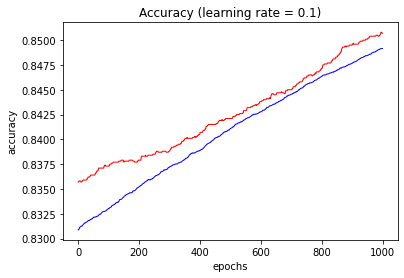

In [285]:
line_chart1 = plt.plot(range(len(Accu_train)), Accu_train, color="blue", linewidth=1.0, linestyle="-")
line_chart2 = plt.plot(range(len(Accu_test)),Accu_test, color="red", linewidth=1.0, linestyle="-")
plt.title("Accuracy (learning rate = 0.1)") 
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend(['training', 'testing'], loc=3)
plt.show()